In [1]:
from main import *

## Gun Modelv2 non sym

OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/


/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


[8.00962435e-04 8.01463231e-04 8.01820658e-04 8.02051966e-04
 8.02173723e-04 8.02203758e-04 8.02162764e-04 8.02077096e-04
 8.01981871e-04 8.01925437e-04 8.01974663e-04 8.02222018e-04
 8.02793303e-04 8.03855964e-04 8.05625529e-04 8.08366298e-04
 8.12378283e-04 8.17958987e-04 8.25323209e-04 8.34465594e-04
 8.44964863e-04 8.55773274e-04 8.65122426e-04 8.70803312e-04
 8.71203628e-04 8.67551391e-04 8.67732653e-04 8.91076751e-04
 9.69181851e-04 1.13329882e-03 1.39400720e-03 1.73820980e-03
 2.14385429e-03 2.59244959e-03 3.07203392e-03 3.57633783e-03
 2.35711713e-01 5.74309481e-01 7.30454546e-01 8.24709517e-01
 8.84274411e-01 9.22074265e-01 9.45975002e-01 9.61249165e-01
 9.71445907e-01 9.78824475e-01 9.84704935e-01 9.89809841e-01
 9.94556180e-01 9.99247116e-01 1.00416118e+00 1.00957524e+00
 1.01573852e+00 1.02273225e+00 1.03052244e+00 1.03924634e+00
 1.04870537e+00 1.05838865e+00 1.06769343e+00 1.07613559e+00
 1.08348814e+00 1.08979705e+00 1.09529618e+00 1.10028489e+00
 1.10502176e+00 1.109656

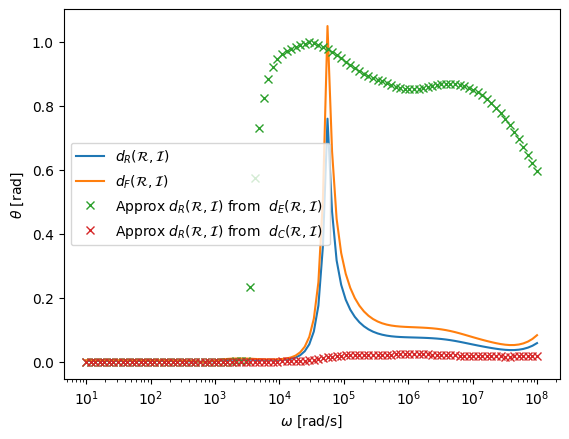

Computing F measure Tilde
[1.41421309 1.41421309 1.41421309 1.41421309 1.41421309 1.41421309
 1.41421308 1.41421308 1.41421308 1.41421308 1.41421307 1.41421306
 1.41421305 1.41421304 1.41421302 1.41421299 1.41421295 1.41421289
 1.4142128  1.41421268 1.41421248 1.41421219 1.41421173 1.41421102
 1.41420991 1.41420817 1.41420534 1.41420042 1.4141908  1.41416763
 1.41407603 1.41132116 1.39659781 1.36899408 1.32194645 1.24656186
 1.12291442 0.95308979 0.80747861 0.6860233  0.58691818 0.50714115
 0.44311755 0.3913002  0.34855107 0.31230255 0.28054385 0.25170891
 0.22452721 0.1978593  0.17050397 0.14097967 0.10779231 0.07493824
 0.0560119  0.04742893 0.04233071 0.03842149 0.03502461 0.03197388
 0.0292609  0.02690796 0.0249255  0.02330378 0.02201622 0.02102417
 0.0202805  0.01973257 0.0193258  0.01900809 0.01873431 0.01846955
 0.01818997 0.01788113 0.01753457 0.01714407 0.01670294 0.0162031
 0.01563618 0.01499663 0.01428577 0.01351565 0.01271096 0.0119079
 0.01115016 0.01048424 0.00995723 0.00

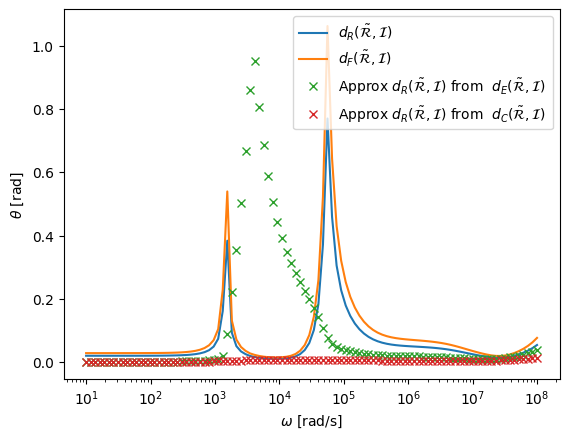

[1.41421309 1.41421309 1.41421309 1.41421309 1.41421309 1.41421309
 1.41421309 1.41421308 1.41421308 1.41421308 1.41421308 1.41421307
 1.41421306 1.41421305 1.41421304 1.41421302 1.41421299 1.41421295
 1.41421289 1.41421281 1.4142127  1.41421255 1.41421235 1.4142121
 1.4142118  1.41421144 1.41421103 1.41421056 1.41421003 1.41420944
 1.41420885 1.41420828 1.41420779 1.41420737 1.41420698 1.41420652
 1.39231863 1.27471214 1.17194546 1.08271927 1.00541958 0.93810317
 0.87855596 0.82445671 0.77363641 0.72435358 0.67546011 0.62636441
 0.57680089 0.52651347 0.47499024 0.42146    0.36633972 0.31966294
 0.29652923 0.28572912 0.27833991 0.272044   0.26631876 0.26111982
 0.25649172 0.25243902 0.24890527 0.2457971  0.24301796 0.24049478
 0.23819266 0.23611752 0.23430744 0.23281457 0.23168266 0.23092766
 0.23052819 0.23042718 0.23054163 0.23077489 0.2310276  0.23120553
 0.23122435 0.2310118  0.23050885 0.2296715  0.22847405 0.22691207
 0.22500095 0.22276687 0.22023145 0.21739625 0.21423501 0.21069

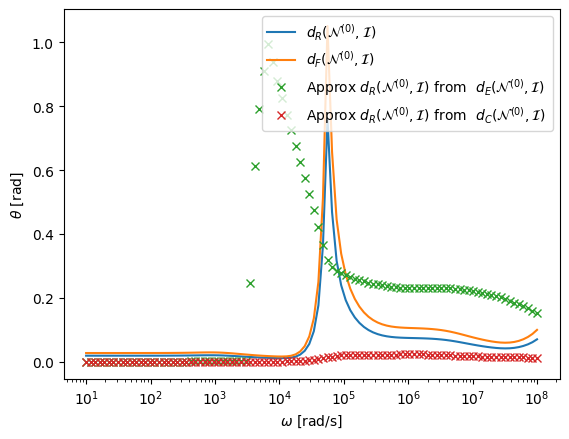

[0.00056883 0.00056896 0.00056886 0.00056849 0.00056782 0.00056677
 0.00056525 0.00056313 0.00056024 0.00055635 0.00055114 0.00054423
 0.00053513 0.00052329 0.0005081  0.00048909 0.00046627 0.00044082
 0.00041647 0.00040135 0.0004087  0.00045213 0.00053638 0.00065497
 0.00079637 0.00094998 0.00110945 0.00127357 0.00144413 0.00162178
 0.00180261 0.00197795 0.00213725 0.00227219 0.00237991 0.0024638
 0.00253154 0.00259145 0.00264934 0.00270688 0.00276163 0.00280842
 0.00284167 0.00285816 0.00285869 0.00284793 0.00283246 0.00281863
 0.00281124 0.00281363 0.00282851 0.00285888 0.00290839 0.00298065
 0.00307778 0.00319902 0.00334043 0.00349557 0.00365676 0.00381636
 0.00396804 0.0041078  0.00423441 0.00434922 0.00445526 0.00455606
 0.00465459 0.00475248 0.00484995 0.00494622 0.00504013 0.00513074
 0.00521758 0.00530048 0.0053793  0.00545364 0.00552281 0.00558605
 0.00564285 0.00569316 0.00573747 0.00577658 0.00581137 0.00584254
 0.0058705  0.00589538 0.00591719 0.00593595 0.00595186 0.00596

ValueError: 
d_R( {\cal N}^{(0)},{\cal R)
                            ^
ParseFatalException: Expected '}', found end of text  (at char 28), (line:1, col:29)

<Figure size 640x480 with 1 Axes>

[1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421355 1.41421353
 1.41421346 1.41421331 1.41421302 1.41421247 1.41421139 1.41420886
 1.41419938 1.41394081 1.41285167 1.41136896 1.40951882 1.40737231
 1.40506587 1.40276879 1.40063581 1.39877186 1.39722203 1.3959823
 1.39501935 1.39428894 1.39374778 1.39335827 1.39308866 1.39291165
 1.39280351 1.39274409 1.39271712 1.39271032 1.39271495 1.39272536
 1.39273839 1.39275289 1.39276893 1.39278717 1.39280809 1.39283167
 1.39285727 1.39288395 1.39291082 1.39293735 1.39296341 1.39298916
 1.39301479 1.39304029 1.39306537 1.3930895  1.39311207 1.3931326
 1.39315081 1.39316662 1.39318007 1.39319131 1.39320049 1.39320788
 1.39321377 1.39321857 1.39322271 1.39322663 1.39323074 1.39323534
 1.39324059 1.39324646 1.39325281 1.39325941 1.39326609 1.393272

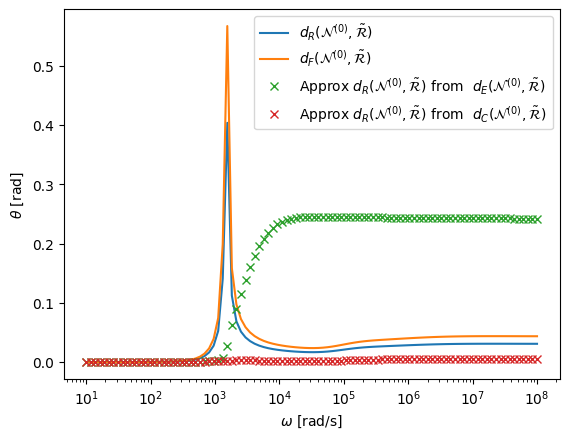

In [2]:

#DirList=["OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#    "OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#DirList=["OCC_Gun_modelv2_nonsym_al/al_0.01_mu_1,1_sig_3.5e7,3.5e7/1e1-1e8_40_el_26657_ord_2_POD_13_1e-6/Data/"]

#DirList=["OCC_Gun_modelv2_small/al_0.001_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_25735_ord_5_POD_13_1e-6/Data/"]

SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
p=4
mu=20

#directory="OCC_Gun_modelv2_small/al_0.001_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_25735_ord_5_POD_13_1e-6/Data/"

directory="OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_"+str(p)+"_POD_13_1e-6/Data/"
print(directory)
RIResults,RtildeIResults, N0IResults, N0RResults, N0RtildeResults=main(directory,MaxOmega,Figures="On")    
SaveRIList=[]
SaveRtilde=[]



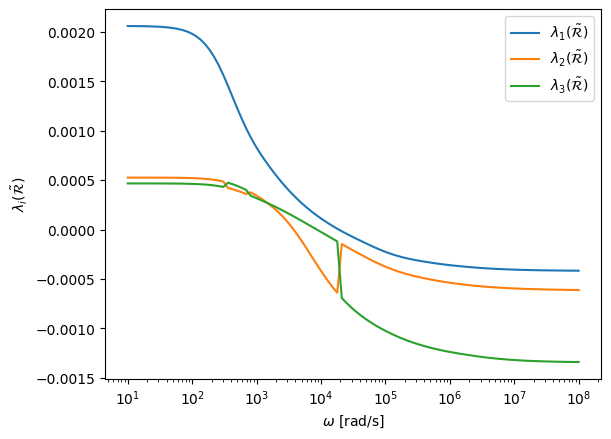

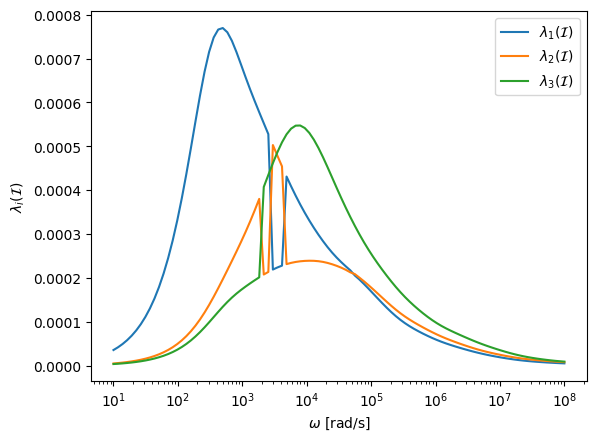

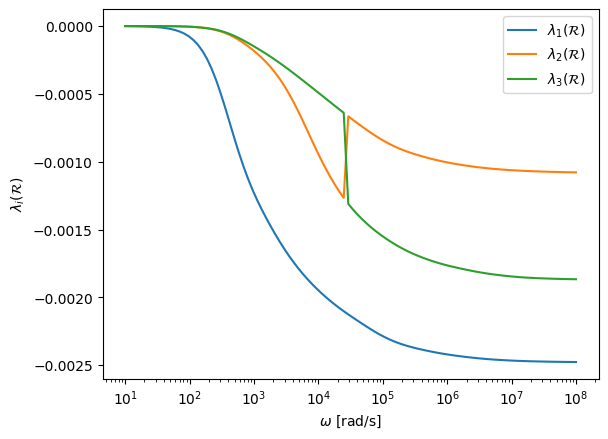

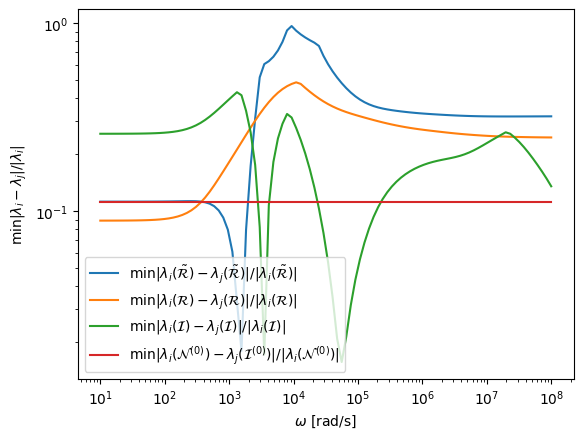

In [3]:
Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]


Labels=[r"$\lambda_1(\tilde{\cal R})$",r"$\lambda_2(\tilde{\cal R})$",r"$\lambda_3(\tilde{\cal R})$"]
plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,URtildestore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i(\tilde{\cal R})$")
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_Rtilde_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal I})$",r"$\lambda_2({\cal I})$",r"$\lambda_3({\cal I})$"]
for n in range(3):
    plt.semilogx(Frequencies,UIstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal I})$")
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal R})$",r"$\lambda_2({\cal R})$",r"$\lambda_3({\cal R})$"]
for n in range(3):
    plt.semilogx(Frequencies,URstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal R})$")
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_R_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()


relmindiffRtilde = np.zeros(len(Frequencies))
relmindiffI = np.zeros(len(Frequencies))
relmindiffR = np.zeros(len(Frequencies))
relmindiffN0 = np.zeros(len(Frequencies))


for n in range(len(Frequencies)):
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m]) < d:
                d=abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m])
            if abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,k]) < d:
                d=abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,k])
                
    relmindiffRtilde[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) < d:
                d=abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) 
            if abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,k]) < d:
                d=abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,k]) 
    relmindiffI[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m]) < d:
                d=abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m])
            if abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,k]) < d:
                d=abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,k])
                
    relmindiffR[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) < d:
                d=abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) 
            if abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,k]) < d:
                d=abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,k]) 
    relmindiffN0[n]=d
     

    
plt.figure()
plt.loglog(Frequencies,relmindiffRtilde,label=r"$\min |\lambda_i(\tilde{\cal R})-\lambda_j(\tilde{\cal R})|/|\lambda_i(\tilde{\cal R})|$")
plt.loglog(Frequencies,relmindiffR,label=r"$\min |\lambda_i({\cal R})-\lambda_j({\cal R})|/|\lambda_i({\cal R})|$")
plt.loglog(Frequencies,relmindiffI,label=r"$\min |\lambda_i({\cal I})-\lambda_j({\cal I})|/|\lambda_i({\cal I})|$")
plt.loglog(Frequencies,relmindiffN0,label=r"$\min |\lambda_i({\cal N}^{(0)})-\lambda_j({\cal I}^{(0)})|/|\lambda_i({\cal N}^{(0)})|$")
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\min |\lambda_i-\lambda_j|/|\lambda_i|$")
plt.legend()

#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_prox_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

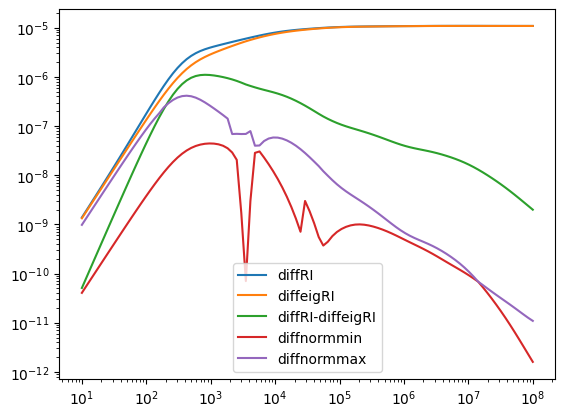

In [8]:
Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])

Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]

Rstore=RIResults["Rstore"]
Rtildestore=RIResults["Rtildestore"]
Istore=RIResults["Istore"]
N0store=RIResults["N0store"]


N=len(Frequencies)
diffRI=np.zeros(N)
diffeigRI=np.zeros(N)
diffnormmin=np.zeros(N)
diffnormmax=np.zeros(N)
uR=np.zeros(3)
uI=np.zeros(3)
R=np.zeros((3,3))
I=np.zeros((3,3))
Rtilde=np.zeros((3,3))
N0=np.zeros((3,3))

sorteigenvalues="MinDifference"
for n in range(N):
    for i in range(3):
        uR[i]=URstore[n,i]
        uI[i]=UIstore[n,i]

        for j in range(3):
            R[i,j]=Rstore[n,i,j]
            I[i,j]=Istore[n,i,j]
            Rtilde[i,j]=Rtildestore[n,i,j]
            N0[i,j]=N0store[n,i,j]
        
            
    if sorteigenvalues=="MinDifference":
            # Find min combination

        diffeig=1e10

    elif sorteigenvalues=="MaxDifference":
            # Find max combination
        diffeig=0.

    for m in range(6):
        mysum=0.
        ind=Perm[m,:]
        for i in range(3):
            mysum = mysum+ (uR[i]-uI[ind[i]-1])**2
        check = False
        if sorteigenvalues=="MinDifference" and mysum < diffeig:
            check = True
        elif sorteigenvalues=="MaxDifference" and mysum > diffeig:
            check = True
        if check==True:
            diffeig = mysum
            puI=np.zeros(3,dtype=np.longdouble)
        #         #S=np.zeros((3,3))
            for i in range(3):
                puI[i]=uI[ind[i]-1]
       

    evlist=np.zeros(3)    
    evlist[0]= - (puI[1]-puI[2])*(uI[1]-uI[2])
    evlist[1]= - (puI[0]-puI[2])*(uI[0]-uI[2])
    evlist[2]= - (puI[0]-puI[1])*(uI[0]-uI[1])
    normalisation_min = np.min(np.abs(evlist))
    normalisation_max = np.max(np.abs(evlist))

    Tol=1e-6
    diffRI[n]=np.linalg.norm(R-I,ord='fro')**2
    diffeigRI[n]=diffeig
    diffnormmin[n]=normalisation_min
    diffnormmax[n]=normalisation_max

plt.figure()
plt.loglog(Frequencies,diffRI,label='diffRI')
plt.loglog(Frequencies,diffeigRI,label='diffeigRI')
plt.loglog(Frequencies,np.abs(diffeigRI-diffRI),label='diffRI-diffeigRI')

plt.loglog(Frequencies,diffnormmin,label='diffnormmin')
plt.loglog(Frequencies,diffnormmax,label='diffnormmax')
plt.legend()


dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff'])


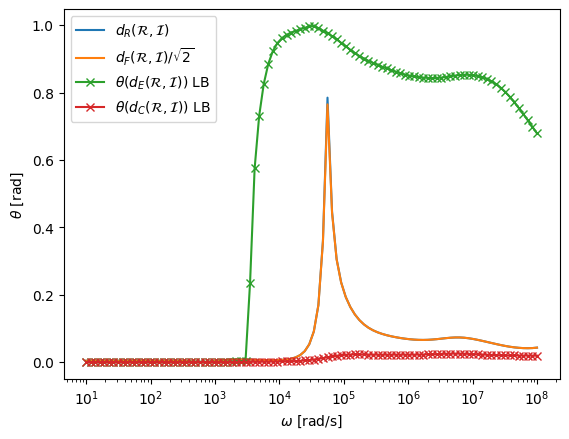

In [29]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],
                                                     RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasapprxconstsortedmax=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"])


AnglestoreRIcommeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmax=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')
#plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ UB')

plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')
#plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ UB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

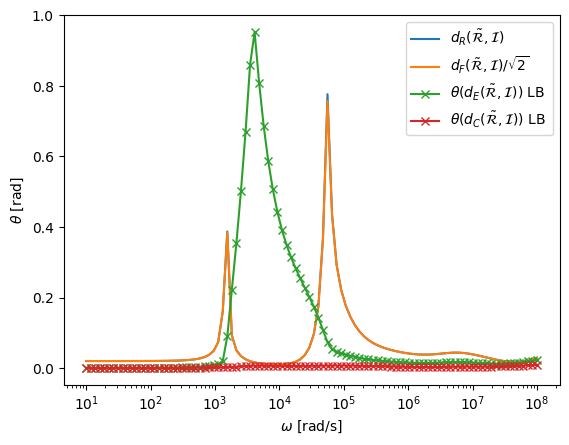

In [30]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasapprxconstsortedmax=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"])

AnglestoreRtildeIcommeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"])
AnglestoreRtildeIcommeasapprxconstsortedmax=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RtildeI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

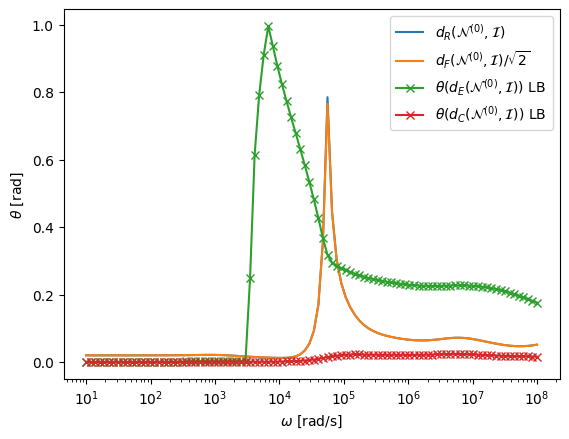

In [31]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Ifmeasapprxconstsortedmax=np.fmax(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_max"])

AnglestoreN0Icommeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmax=np.fmax(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,2)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

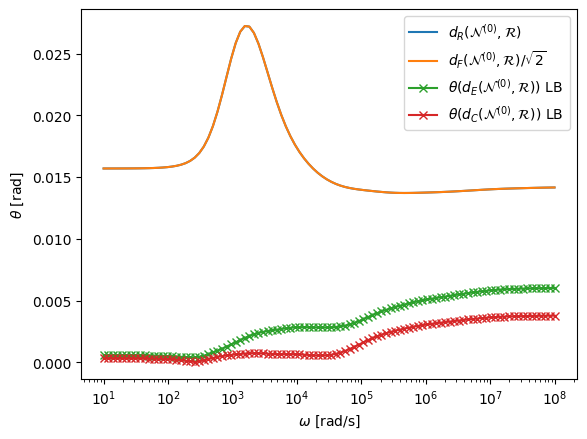

In [32]:
Frequencies=N0RResults["Frequencies"]
MinAnglestoreN0R=N0RResults["MinAnglestoreN0R"]
AnglestoreN0Rfmeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_min"])
AnglestoreN0Rfmeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_max"])

AnglestoreN0Rcommeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_min"])
AnglestoreN0Rcommeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0R = N0RResults["dFMinAnglestoreN0R"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0R,label=r'$d_R({\cal N}^{(0)},{\cal R})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0R/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal R})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Rfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal R}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Rcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal R}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0R_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

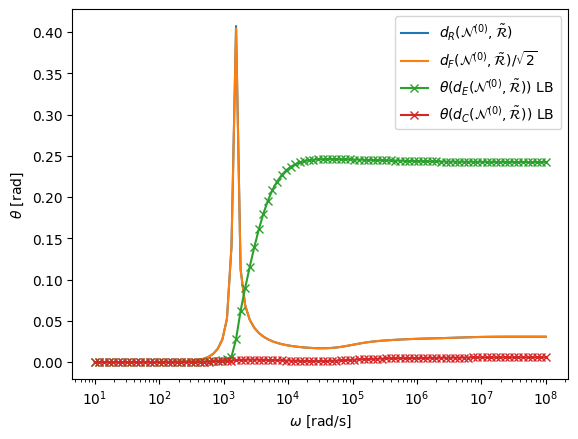

In [33]:
Frequencies=N0RtildeResults["Frequencies"]
MinAnglestoreN0Rtilde=N0RtildeResults["MinAnglestoreN0Rtilde"]
AnglestoreN0Rtildefmeasapprxconstsortedmin=np.fmin(N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmaxdiff_min"],N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmindiff_min"])
AnglestoreN0Rtildefmeasapprxconstsortedmax=np.fmax(N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmaxdiff_max"],N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmindiff_max"])

AnglestoreN0Rtildecommeasapprxconstsortedmin=np.fmin(N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmaxdiff_min"],N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmindiff_min"])
AnglestoreN0Rtildecommeasapprxconstsortedmax=np.fmax(N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmaxdiff_max"],N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0Rtilde = N0RtildeResults["dFMinAnglestoreN0Rtilde"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0Rtilde,label=r'$d_R({\cal N}^{(0)},\tilde{\cal R})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0Rtilde/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},\tilde{\cal R})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Rtildefmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},\tilde{\cal R}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Rtildecommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},\tilde{\cal R}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0Rtilde_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

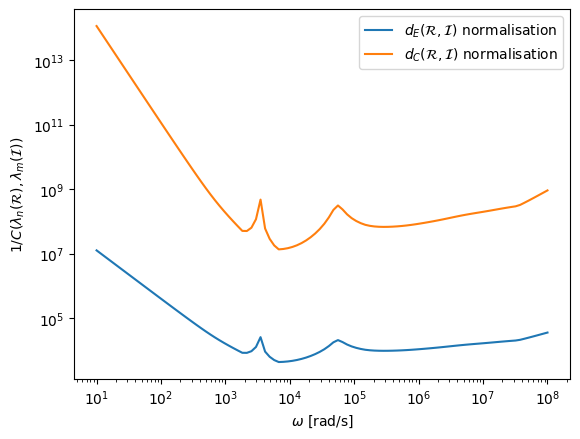

In [9]:
Frequencies=RIResults["Frequencies"]
RIcommeapprx_den_const=np.fmin(RIResults["RIcommeapprx_den_const_max"],RIResults["RIcommeapprx_den_const_min"])
RIfmeasapprx_den_const=np.fmin(RIResults["RIfmeasapprx_den_const_max"],RIResults["RIfmeasapprx_den_const_min"])



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.loglog(Frequencies,1/RIfmeasapprx_den_const,label=r'$d_E({\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RIcommeapprx_den_const,label=r'$d_C({\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal R}),\lambda_m({\cal I}))$')
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

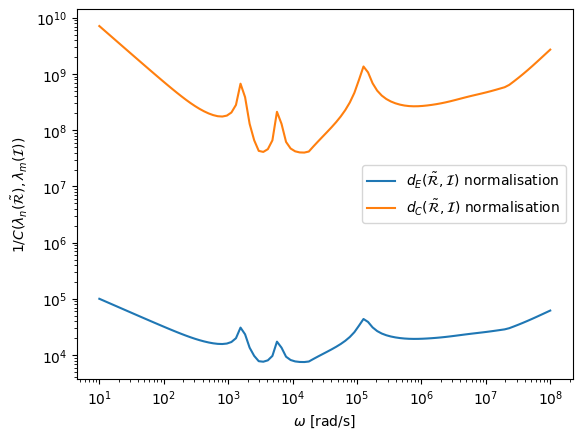

In [9]:
Frequencies=RtildeIResults["Frequencies"]
RtildeIcommeapprx_den_const=np.fmin(RtildeIResults["RtildeIcommeapprx_den_const_max"],RtildeIResults["RtildeIcommeapprx_den_const_min"])
RtildeIfmeasapprx_den_const=np.fmin(RtildeIResults["RtildeIfmeasapprx_den_const_max"],RtildeIResults["RtildeIfmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/RtildeIfmeasapprx_den_const,label=r'$d_E(\tilde{\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RtildeIcommeapprx_den_const,label=r'$d_C(\tilde{\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n(\tilde{\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_Rtilde0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

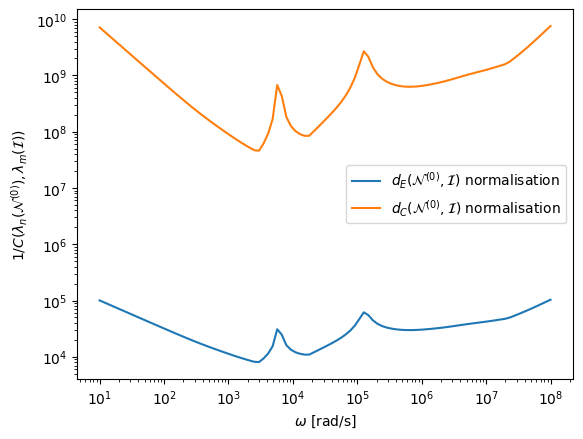

In [10]:
Frequencies=RIResults["Frequencies"]
N0Icommeapprx_den_const=np.fmin(N0IResults["N0Icommeapprx_den_const_max"],N0IResults["N0Icommeapprx_den_const_min"])
N0Ifmeasapprx_den_const=np.fmin(N0IResults["N0Ifmeasapprx_den_const_max"],N0IResults["N0Ifmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/N0Ifmeasapprx_den_const,label=r'$d_E({\cal N}^{(0)},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/N0Icommeapprx_den_const,label=r'$d_C({\cal N}^{(0)},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal N}^{(0)}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()